In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("../data/movieReplicationSet.csv")

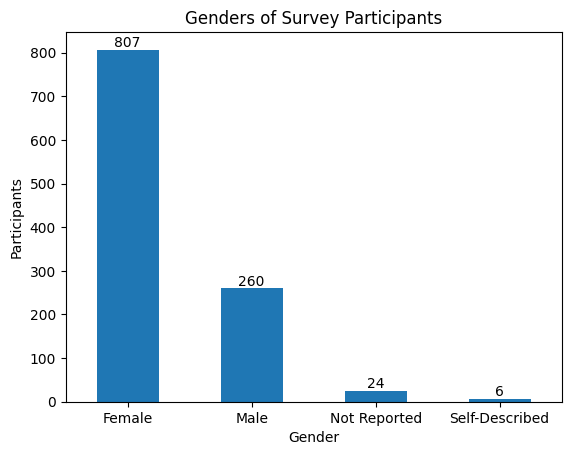

In [44]:
# Plot counts of participant genders
gender_col_name = df.columns[474]  # get gender column in dataframe
x_values = ["Female", "Male", "Not Reported", "Self-Described"]  # X labels
y_values = df[gender_col_name].value_counts(dropna = False)  # Y values - do not drop na values. Instead these will be plotted as "Not Reported"

# Create new dataframe with gender counts - will make it easier to plot
df_bars = pd.DataFrame({
    "x": x_values,
    "y": y_values
})

ax = df_bars.plot(kind="bar", x="x", y="y", legend=False)  # bar plot
ax.bar_label(ax.containers[0])  # add value labels on top of each bar
plt.xticks(rotation=0)  # keep x tick labels horizontal
plt.title("Genders of Survey Participants")
plt.xlabel("Gender")
plt.ylabel("Participants")
plt.show()